<a href="https://colab.research.google.com/github/tpenanen/Laptop-Price-Project/blob/main/Label_encoding_and_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/laptop_price.csv', encoding = 'latin1')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_usd
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.0,436.7600
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.0,840.7630
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2.1kg,367.0,400.7273
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,Windows 10,2.2kg,682.0,744.6758
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,2.2kg,841.0,918.2879


In [48]:
print(data["Company"].unique())
name = data["Company"]
Company_names = []
Acer_count = Apple_count=Asus_count=Chuwi_count = Dell_count = Fujitsu_count= Google_count = HP_count = Huawei_count = Lenovo_count = LG_count = Media_count = Microsoft_count=0
Msi_count = razer_count = samsung_count = toshi_count = vero_count = Xiaomi_count = 0
for c in name:
  c = c.strip()
  if c == "Acer":
    Acer_count+=1
    Company_names.append("Acer")
  if c == "Apple":
    Apple_count+=1
    Company_names.append("Apple")
  if c == "Asus":
    Asus_count+=1
    Company_names.append("Asus")
  if c == "Chuwi":
    Chuwi_count+=1
    Company_names.append("Chuwi")
  if c == "Dell":
    Dell_count+=1
    Company_names.append("Dell")
  if c == "Fujitsu":
    Fujitsu_count+=1
    Company_names.append("Fujitsu")
  if c == "Google":
    Google_count+=1
    Company_names.append("Google")
  if c == "HP":
    HP_count+=1
    Company_names.append("HP")
  if c == "Huawei":
    Huawei_count+=1
    Company_names.append("Huawei")
  if c == "Lenovo":
    Lenovo_count+=1
    Company_names.append("Lenovo")
  if c == "LG":
    LG_count+=1
    Company_names.append("LG")
  if c == "Mediacom":
    Media_count+=1
    Company_names.append("Mediacom")
  if c == "Microsoft":
    Microsoft_count+=1
    Company_names.append("Microsoft")
  if c == "MSI":
    Msi_count+=1
    Company_names.append("MSI")
  if c == "Razer":
    Company_names.append("Razer")
    razer_count+=1
  if c == "Samsung":
    Company_names.append("Samsung")
    samsung_count+=1
  if c == "Toshiba":
    Company_names.append("Toshiba")
    toshi_count+=1
  if c == "Vero":
    Company_names.append("Vero")
    vero_count+=1
  if c == "Xiaomi":
    Company_names.append("Xiaomi")
    Xiaomi_count+=1

print(Acer_count,Asus_count,Apple_count,Chuwi_count,Dell_count,HP_count,Huawei_count,Lenovo_count,LG_count,Media_count,Microsoft_count,Msi_count,razer_count,samsung_count,toshi_count,vero_count,Xiaomi_count)

data["Company_converted"] = Company_names
print(data[["Company","Company_converted"]].head())

le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company_converted'])
print(data[['Company_converted', 'Company_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'Lenovo' 'LG' 'Mediacom' 'Microsoft' 'MSI' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']
103 158 21 3 297 274 2 297 3 7 6 54 7 9 48 4 4
  Company Company_converted
0    Acer              Acer
1    Acer              Acer
2    Acer              Acer
3    Acer              Acer
4    Acer              Acer
  Company_converted  Company_Label
0              Acer              0
1              Acer              0
2              Acer              0
3              Acer              0
4              Acer              0
Label mapping: {'Acer': np.int64(0), 'Apple': np.int64(1), 'Asus': np.int64(2), 'Chuwi': np.int64(3), 'Dell': np.int64(4), 'Fujitsu': np.int64(5), 'Google': np.int64(6), 'HP': np.int64(7), 'Huawei': np.int64(8), 'LG': np.int64(9), 'Lenovo': np.int64(10), 'MSI': np.int64(11), 'Mediacom': np.int64(12), 'Microsoft': np.int64(13), 'Razer': np.int64(14), 'Samsung': np.int64(15), 'Toshiba': np.int64(16), 'Vero': np.i

In [49]:
a = data['Gpu']
intel_count = 0
Nvidia_count = 0
Amd_count = 0
Gpu_brands = []
for i in a:
  m = i.split(" ")
  if m[0] == "Intel":
    intel_count +=1
    Gpu_brands.append("Intel")
  if m[0] == "Nvidia":
    Nvidia_count += 1
    Gpu_brands.append("Nvidia")
  if m[0] == "AMD":
    Amd_count +=1
    Gpu_brands.append("AMD")
  if m[0] == "ARM":
    Gpu_brands.append("ARM")
print(intel_count)
print(Nvidia_count)
print(Amd_count)
print(intel_count+Amd_count+Nvidia_count)
data["Gpu_Brands"] = Gpu_brands
print(data[["Gpu","Gpu_Brands"]].head())

le = LabelEncoder()
data['Gpu_Brands_Label'] = le.fit_transform(data['Gpu_Brands'])
print(data[['Gpu_Brands', 'Gpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

722
400
180
1302
                      Gpu Gpu_Brands
0           AMD Radeon R5        AMD
1  Intel UHD Graphics 620      Intel
2   Intel HD Graphics 620      Intel
3  Intel UHD Graphics 620      Intel
4    Nvidia GeForce MX150     Nvidia
  Gpu_Brands  Gpu_Brands_Label
0        AMD                 0
1      Intel                 2
2      Intel                 2
3      Intel                 2
4     Nvidia                 3
Label mapping: {'AMD': np.int64(0), 'ARM': np.int64(1), 'Intel': np.int64(2), 'Nvidia': np.int64(3)}


In [50]:
import pandas as pd


# Filter only Intel CPUs
intel_cpus = data[data['Cpu'].str.startswith('Intel ', na=False)]

# Count unique Intel CPU types
intel_cpu_counts = intel_cpus['Cpu'].value_counts()

# Print them
for cpu, count in intel_cpu_counts.items():
    print(f"{cpu}: {count}")
#Data Analysis
"""
Intel Xeon:5
Core i5: 423
Core i7: 527
Core i3: 136
Core M: 19
Pentium:30
Celeron:88
Atom:13
AMD:62
Samsung:1
"""

Intel Core i5 7200U 2.5GHz: 190
Intel Core i7 7700HQ 2.8GHz: 146
Intel Core i7 7500U 2.7GHz: 134
Intel Core i7 8550U 1.8GHz: 73
Intel Core i5 8250U 1.6GHz: 72
Intel Core i5 6200U 2.3GHz: 68
Intel Core i3 6006U 2GHz: 64
Intel Core i7 6500U 2.5GHz: 49
Intel Core i7 6700HQ 2.6GHz: 43
Intel Core i3 7100U 2.4GHz: 37
Intel Core i5 7300HQ 2.5GHz: 33
Intel Celeron Dual Core N3350 1.1GHz: 30
Intel Celeron Dual Core N3060 1.6GHz: 28
Intel Core i7 6600U 2.6GHz: 18
Intel Core i3 6006U 2.0GHz: 16
Intel Pentium Quad Core N4200 1.1GHz: 14
Intel Core i5 7300U 2.6GHz: 14
Intel Core i7 7600U 2.8GHz: 13
Intel Core i5 6300U 2.4GHz: 11
Intel Pentium Quad Core N3710 1.6GHz: 11
Intel Celeron Dual Core N3050 1.6GHz: 11
Intel Core i7 6820HK 2.7GHz: 10
Intel Core i3 6100U 2.3GHz: 9
Intel Core i3 7130U 2.7GHz: 8
Intel Core i7 7820HK 2.9GHz: 7
Intel Core i5 6300HQ 2.3GHz: 7
Intel Core i7 6820HQ 2.7GHz: 7
Intel Core i5 7440HQ 2.8GHz: 5
Intel Core i7 7820HQ 2.9GHz: 5
Intel Core M 6Y75 1.2GHz: 5
Intel Atom x5-Z8350 

'\nIntel Xeon:5\nCore i5: 423\nCore i7: 527\nCore i3: 136\nCore M: 19\nPentium:30\nCeleron:88\nAtom:13\nAMD:62\nSamsung:1\n'

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
CPU = data["Cpu"]
Cpu_brands = []
for m in CPU:
  Cpu_split= m.split(" ")
  if Cpu_split[0] == "Intel":
    if Cpu_split[1] == "Core":
      if Cpu_split[2] == "i3":
        Cpu_brands.append("Core i3")
      if Cpu_split[2] == "i5":
        Cpu_brands.append("Core i5")
      if Cpu_split[2] == "i7":
        Cpu_brands.append("Core i7")
      if Cpu_split[2] == "M":
        Cpu_brands.append("Core M")
    if Cpu_split[1] == "Xeon":
      Cpu_brands.append("Xeon")
    if Cpu_split[1] == "Pentium":
      Cpu_brands.append("Pentium")
    if Cpu_split[1] == "Celeron":
      Cpu_brands.append("Celeron")
    if Cpu_split[1] == "Atom":
      Cpu_brands.append("Atom")

  if Cpu_split[0] == "AMD":
    Cpu_brands.append("AMD")

  if Cpu_split[0] == "Samsung":
    Cpu_brands.append("Samsung")



data["Cpu_Brands"] = Cpu_brands
print(data[["Cpu","Cpu_Brands"]].head())

le = LabelEncoder()
data['Cpu_Brands_Label'] = le.fit_transform(data['Cpu_Brands'])
print(data[['Cpu_Brands', 'Cpu_Brands_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


                          Cpu Cpu_Brands
0     AMD A9-Series 9420 3GHz        AMD
1  Intel Core i5 8250U 1.6GHz    Core i5
2  Intel Core i3 7130U 2.7GHz    Core i3
3  Intel Core i5 8250U 1.6GHz    Core i5
4  Intel Core i7 8550U 1.8GHz    Core i7
  Cpu_Brands  Cpu_Brands_Label
0        AMD                 0
1    Core i5                 5
2    Core i3                 4
3    Core i5                 5
4    Core i7                 6
Label mapping: {'AMD': np.int64(0), 'Atom': np.int64(1), 'Celeron': np.int64(2), 'Core M': np.int64(3), 'Core i3': np.int64(4), 'Core i5': np.int64(5), 'Core i7': np.int64(6), 'Pentium': np.int64(7), 'Samsung': np.int64(8), 'Xeon': np.int64(9)}


In [52]:
Type = data["TypeName"]
note_count = 0
ultra_count = 0
conv_count = 0
gaming_count = 0
net_count = 0
work_count = 0
print(data["TypeName"].unique())
Type_names = []
for t in Type:
  if t == "Notebook":
    note_count +=1
    Type_names.append("Notebook")
  if t == "Ultrabook":
    ultra_count += 1
    Type_names.append("Ultrabook")
  if t == "2 in 1 Convertible":
    conv_count += 1
    Type_names.append("Convertible")
  if t == "Gaming":
    Type_names.append("Gaming")
    gaming_count += 1
  if t == "Netbook":
    net_count += 1
    Type_names.append("Netbook")
  if t == "Workstation":
    Type_names.append("Workstation")
    work_count += 1
print(note_count)
print(ultra_count)
print(conv_count)
print(gaming_count)
print(net_count)
print(work_count)

data["TypeName_converted"] = Type_names
print(data[["TypeName","TypeName_converted"]].head())

le = LabelEncoder()
data['TypeName_Label'] = le.fit_transform(data['TypeName_converted'])
print(data[['TypeName_converted', 'TypeName_Label']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
727
196
121
205
25
29
    TypeName TypeName_converted
0   Notebook           Notebook
1  Ultrabook          Ultrabook
2   Notebook           Notebook
3   Notebook           Notebook
4   Notebook           Notebook
  TypeName_converted  TypeName_Label
0           Notebook               3
1          Ultrabook               4
2           Notebook               3
3           Notebook               3
4           Notebook               3
Label mapping: {'Convertible': np.int64(0), 'Gaming': np.int64(1), 'Netbook': np.int64(2), 'Notebook': np.int64(3), 'Ultrabook': np.int64(4), 'Workstation': np.int64(5)}


In [53]:
print(data["Ram"].unique())
ram = data["Ram"]
ram_types = []
count_2=count_4=count_6=count_8=count_12=count_16=count_24=count_32=count_64=0
for r in ram:
  if r == "2GB":
    ram_types.append("2")
    count_2+=1
  if r == "4GB":
    count_4+=1
    ram_types.append("4")
  if r == "6GB":
    count_6 +=1
    ram_types.append("6")
  if r == "8GB":
    count_8+=1
    ram_types.append("8")
  if r == "12GB":
    count_12+=1
    ram_types.append("12")
  if r == "16GB":
    count_16+=1
    ram_types.append("16")
  if r == "24GB":
    count_24+=1
    ram_types.append("24")
  if r == "32GB":
    count_32+=1
    ram_types.append("32")
  if r == "64GB":
    count_64+=1
    ram_types.append("64")

print(count_2,count_4,count_6,count_8,count_12,count_16,count_24,count_32,count_64)
data["Ram_types"] = ram_types
print(data[["Ram","Ram_types"]].head())


['4GB' '8GB' '6GB' '12GB' '2GB' '16GB' '32GB' '24GB' '64GB']
22 375 41 619 25 200 3 17 1
   Ram Ram_types
0  4GB         4
1  8GB         8
2  4GB         4
3  4GB         4
4  8GB         8


In [54]:
OP = data["OpSys"]
op_systems = []
for o in OP:
  if o == "Windows 10":
    op_systems.append("Windows 10")
  if o == "Windows 10 S":
    op_systems.append("Windows 10")
  if o == "Windows 7":
    op_systems.append("Windows 7")
  if o == "Linux":
    op_systems.append("Linux")
  if o == "Mac OS X":
    op_systems.append("Mac OS")
  if o == "macOS":
    op_systems.append("Mac OS")
  if o == "No OS":
    op_systems.append("No OS")
  if o == "Chrome OS":
    op_systems.append("Chrome OS")
  if o == "Android":
    op_systems.append("Android")
data["Operating_system"] = op_systems
print(data[["OpSys","Operating_system"]].head())

le = LabelEncoder()
data['OperatingSys_label'] = le.fit_transform(data['Operating_system'])
print(data[['OperatingSys_label', 'Operating_system']].head())

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

        OpSys Operating_system
0  Windows 10       Windows 10
1  Windows 10       Windows 10
2       Linux            Linux
3  Windows 10       Windows 10
4  Windows 10       Windows 10
   OperatingSys_label Operating_system
0                   5       Windows 10
1                   5       Windows 10
2                   2            Linux
3                   5       Windows 10
4                   5       Windows 10
Label mapping: {'Android': np.int64(0), 'Chrome OS': np.int64(1), 'Linux': np.int64(2), 'Mac OS': np.int64(3), 'No OS': np.int64(4), 'Windows 10': np.int64(5), 'Windows 7': np.int64(6)}


In [55]:
def memory_to_gb(mem_string):
    mem_string = mem_string.upper().replace(' ', '')
    parts = mem_string.split('+')
    total_gb = 0
    for part in parts:
        if 'TB' in part:
            num = part.split('TB')[0]
            try:
                total_gb += float(num) * 1000
            except:
                continue
        elif 'GB' in part:
            num = part.split('GB')[0]
            try:
                total_gb += float(num)
            except:
                continue
    return total_gb
data['Memory_GB'] = data['Memory'].apply(memory_to_gb)
print(data[['Memory', 'Memory_GB']].head())




      Memory  Memory_GB
0  500GB HDD      500.0
1  256GB SSD      256.0
2    1TB HDD     1000.0
3  256GB SSD      256.0
4  256GB SSD      256.0


In [56]:
data["Weight"] = data["Weight"].str.replace("kg", "")


In [57]:
columns = (data.columns)
print(columns)
#data['Price_usd'].corr(data["Inches"]) #Correlation: 0.06819666592963934
# data['Price_usd'].corr(data['Company_Label'])#Correlation: 0.14037073774267358
#data['Price_usd'].corr(data['Cpu_Brands_Label'])#Correlation: 0.5032980391739731
#data['Price_usd'].corr(data['Gpu_Brands_Label'])#Correlation: 0.32253518923424707
# data['Price_usd'].corr(data['TypeName_Label'])#Correlation: -0.12731348959766342
# data['Price_usd'].corr(data['Ram_types'])#Correlation: 0.743007135250695
#data['Price_usd'].corr(data['OperatingSys_label'])#Correlation: 0.24147677862687902
#data['Price_usd'].corr(data['Memory_GB'])#Correlation: 0.16081888650343074
#data['Price_usd'].corr(data['Weight']) #Correlation: 0.21036979891687177
data.drop("laptop_ID",axis = 1)
data.drop("Price_euros",axis = 1)




Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'Price_usd', 'Company_converted', 'Company_Label',
       'Gpu_Brands', 'Gpu_Brands_Label', 'Cpu_Brands', 'Cpu_Brands_Label',
       'TypeName_converted', 'TypeName_Label', 'Ram_types', 'Operating_system',
       'OperatingSys_label', 'Memory_GB'],
      dtype='object')


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Gpu_Brands,Gpu_Brands_Label,Cpu_Brands,Cpu_Brands_Label,TypeName_converted,TypeName_Label,Ram_types,Operating_system,OperatingSys_label,Memory_GB
0,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,...,AMD,0,AMD,0,Notebook,3,4,Windows 10,5,500.0
1,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Ultrabook,4,8,Windows 10,5,256.0
2,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,...,Intel,2,Core i3,4,Notebook,3,4,Linux,2,1000.0
3,44,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,Intel UHD Graphics 620,...,Intel,2,Core i5,5,Notebook,3,4,Windows 10,5,256.0
4,52,Acer,Aspire A515-51G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,8,Windows 10,5,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1135,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,...,Intel,2,Atom,1,Notebook,3,4,Windows 10,5,32.0
1299,188,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Notebook,3,8,No OS,4,256.0
1300,196,Xiaomi,Mi Notebook,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i5,5,Ultrabook,4,8,No OS,4,256.0
1301,521,Xiaomi,Mi Notebook,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD,Nvidia GeForce MX150,...,Nvidia,3,Core i7,6,Notebook,3,16,No OS,4,256.0


MAE: 241.15729032304964
RMSE: 359.4812152364644
R² Score: 0.7137115009447765


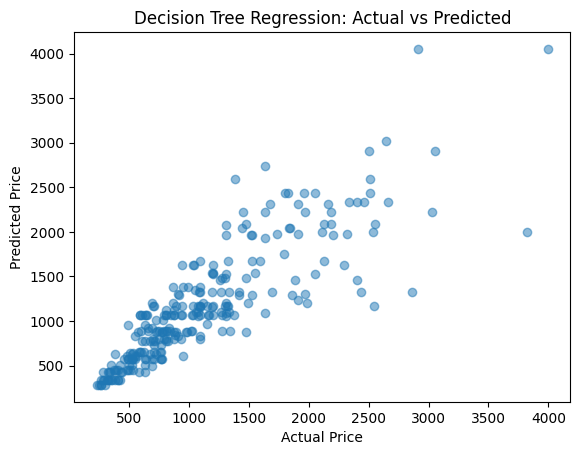

In [118]:
# this is our input features  list
X = data[[
    'Ram_types',
    'Cpu_Brands_Label',
    'Gpu_Brands_Label',
    'OperatingSys_label',
     'Memory_GB',
     'Weight',
     'Company_Label',
     'TypeName_Label',
     'Inches'
]]
# output or target
y = data['Price_usd']

#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Training the data
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth = 25,min_samples_leaf=5,max_leaf_nodes=92,random_state=42) # can add splitter = 'random' to reduce overfitting as well
model.fit(X_train, y_train)

#Evaluating using Rsquared Mae and rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()


In [111]:
#FIGURING OUT BEST MAX_DEPTH
for depth in range(1, 1000):
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_depth = depth
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_depth = depth
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_depth = depth
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| Depth:", best_rmse_depth, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| Depth:", best_mae_depth, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| Depth:", best_r2_depth, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))



Best RMSE: 308.852 | Depth: 25 | MAE: 213.133 | R²: 0.789
Best MAE : 213.133 | Depth: 25 | RMSE: 308.852 | R²: 0.789
Best R²  : 0.789 | Depth: 25 | RMSE: 308.852 | MAE: 213.133


In [112]:
#FIGURING OUT BEST MIN_SAMPLES_LEAF
best_rmse = float('inf')
best_rmse_leaf = None
best_rmse_mae = None
best_rmse_r2 = None

best_mae = float('inf')
best_mae_leaf = None
best_mae_rmse = None
best_mae_r2 = None

best_r2 = float('-inf')
best_r2_leaf = None
best_r2_rmse = None
best_r2_mae = None

for leaf_size in range(1, 1000):
    model = DecisionTreeRegressor(max_depth=25, min_samples_leaf=leaf_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_leaf = leaf_size
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_leaf = leaf_size
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_leaf = leaf_size
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| min_samples_leaf:", best_rmse_leaf, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| min_samples_leaf:", best_mae_leaf, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| min_samples_leaf:", best_r2_leaf, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))


Best RMSE: 308.242 | min_samples_leaf: 5 | MAE: 215.826 | R²: 0.79
Best MAE : 215.826 | min_samples_leaf: 5 | RMSE: 308.242 | R²: 0.79
Best R²  : 0.79 | min_samples_leaf: 5 | RMSE: 308.242 | MAE: 215.826


In [113]:
#FIGURING OUT BEST MAX_LEAF_NODES
best_rmse = float('inf')
best_rmse_mae = None
best_rmse_r2 = None

best_mae = float('inf')
best_mae_rmse = None
best_mae_r2 = None

best_r2 = float('-inf')
best_r2_rmse = None
best_r2_mae = None

for leaf_nodes in range(2, 1000):
    model = DecisionTreeRegressor(max_depth=25,min_samples_leaf=5,max_leaf_nodes=leaf_nodes,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    if rmse < best_rmse:
        best_rmse = rmse
        best_rmse_leaf_nodes = leaf_nodes
        best_rmse_mae = mae
        best_rmse_r2 = r2

    if mae < best_mae:
        best_mae = mae
        best_mae_leaf_nodes = leaf_nodes
        best_mae_rmse = rmse
        best_mae_r2 = r2

    if r2 > best_r2:
        best_r2 = r2
        best_r2_leaf_nodes = leaf_nodes
        best_r2_rmse = rmse
        best_r2_mae = mae

print("Best RMSE:", round(best_rmse, 3), "| max_leaf_nodes:", best_rmse_leaf_nodes, "| MAE:", round(best_rmse_mae, 3), "| R²:", round(best_rmse_r2, 3))
print("Best MAE :", round(best_mae, 3), "| max_leaf_nodes:", best_mae_leaf_nodes, "| RMSE:", round(best_mae_rmse, 3), "| R²:", round(best_mae_r2, 3))
print("Best R²  :", round(best_r2, 3), "| max_leaf_nodes:", best_r2_leaf_nodes, "| RMSE:", round(best_r2_rmse, 3), "| MAE:", round(best_r2_mae, 3))


Best RMSE: 306.814 | max_leaf_nodes: 92 | MAE: 211.654 | R²: 0.791
Best MAE : 211.654 | max_leaf_nodes: 92 | RMSE: 306.814 | R²: 0.791
Best R²  : 0.791 | max_leaf_nodes: 92 | RMSE: 306.814 | MAE: 211.654
